In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from models import DCGAN

In [2]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
cifar10_train = dset.CIFAR10('data/', train=True, download=True, transform=transform)
dataloader = DataLoader(cifar10_train, batch_size=128)
len(dataloader)

Files already downloaded and verified


391

In [3]:
torch.cuda.is_available()

True

# DCGAN

In [4]:
def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

In [5]:
### parameter ###
dtype = torch.cuda.FloatTensor
latent_dim = 100
input_size = 32
hidden_dim = 100

G = DCGAN.Generator(latent_dim, input_size, hidden_dim, dtype)
D = DCGAN.Discriminator(input_size, hidden_dim, dtype)

loss_fn = nn.BCELoss().type(dtype)

G_optimizer = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

torch.cuda.random.manual_seed(12345)
G.apply(reset)
D.apply(reset)

Discriminator(
  (features): Sequential(
    (0): Conv2d(3, 100, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(100, 200, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace)
    (5): Conv2d(200, 400, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace)
    (8): Conv2d(400, 1, kernel_size=(4, 4), stride=(1, 1))
    (9): Sigmoid()
  )
)

In [6]:
trainer = DCGAN.trainer(D, D_optimizer, G, G_optimizer, dtype)

D loss 0.6042, G loss 3.1805


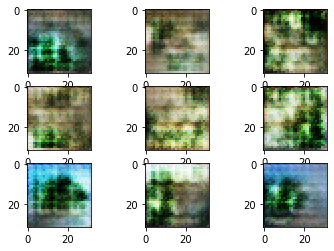

D loss 0.6363, G loss 2.6705


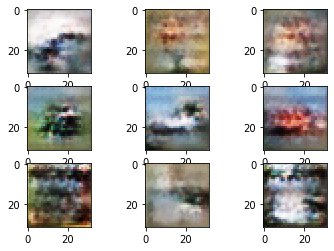

D loss 0.5692, G loss 2.8323


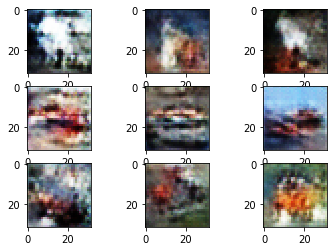

D loss 0.6287, G loss 2.5629


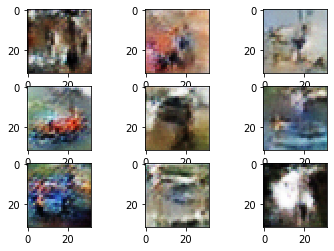

D loss 0.5960, G loss 2.5478


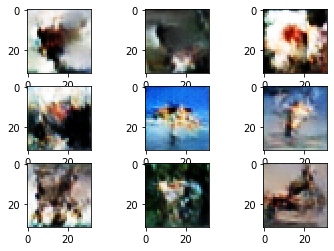

D loss 0.5472, G loss 2.5316


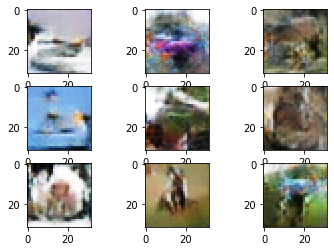

D loss 0.5482, G loss 2.5178


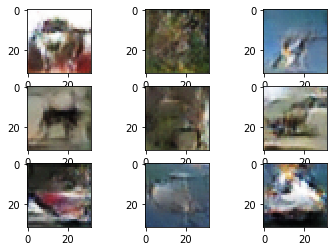

D loss 0.5473, G loss 2.4737


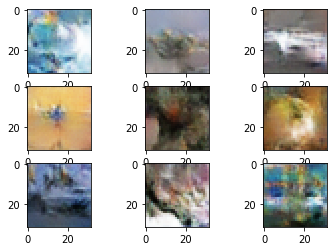

D loss 0.5123, G loss 2.4682


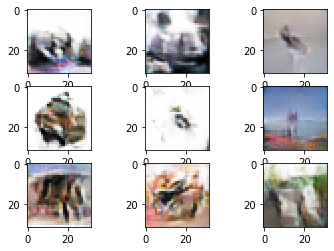

D loss 0.5200, G loss 2.5383


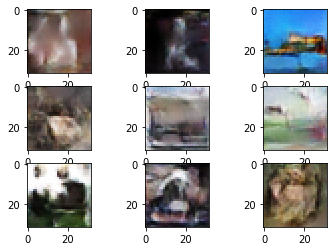

In [7]:
trainer.train(10, dataloader, loss_fn, 1, 9)

# Model save

In [ ]:
torch.save(D.state_dict(), 'data/discriminator_param.pkl')
torch.load(G.state_dict(), 'data/generator_param.pkl')

# Model load

In [10]:
D.load_state_dict(torch.load('data/discriminator_param.pkl'))
G.load_state_dict(torch.load('data/generator_param.pkl'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [11]:
trainer = DCGAN.trainer(D, D_optimizer, G, G_optimizer, dtype)

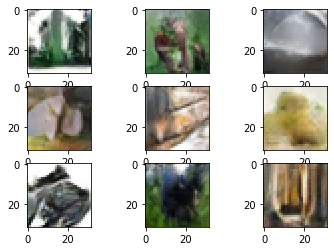

In [12]:
trainer.show_img(9, 100)